In [6]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Normalize
from torch.utils.data import DataLoader

device = 'cuda'
transform = Compose([ToTensor(), Normalize((0.1307,), (0.3081,))])

datasets = {
    'train': MNIST(root='data', train=True, download=True, transform=transform),
    'test': MNIST(root='data', train=False, download=True, transform=transform)
}

In [7]:
from torch import Tensor
from torch.nn import Module
from torch.nn import Flatten,  Sequential
from torch.nn import Linear, ReLU, Dropout
from model.dropconnect import DropConnectLinear, DropConnectBatchAverage

class Perceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            Linear(input_features, hidden_dimension),
            ReLU(),
            Dropout(p),
            Linear(hidden_dimension, output_features),
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)
            

class DropConnectPerceptron(Module):
    def __init__(self, input_features: int, hidden_dimension: int, output_features: int, p: float):
        super().__init__()
        self.flatten = Flatten()
        self.layers = Sequential(
            DropConnectLinear(input_features, hidden_dimension, p=p, max_batch_size=256),
            ReLU(),
            DropConnectBatchAverage(),
            DropConnectLinear(hidden_dimension, output_features, p=p, max_batch_size=256),
            ReLU(),
            DropConnectBatchAverage()
        )

    def forward(self, input: Tensor) -> Tensor:
        input = self.flatten(input)
        return self.layers(input)

In [8]:
import torch
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss
torch.set_float32_matmul_precision('high')   

from uuid import uuid4
from utils import run
from metrics import Summary

In [9]:
loaders = {
    'train': DataLoader(dataset=datasets['train'],batch_size=64,shuffle=True, pin_memory=True, pin_memory_device=device, num_workers=4),
    'test': DataLoader(dataset=datasets['test'],batch_size=64,shuffle=False, pin_memory=True, pin_memory_device=device, num_workers=4)
}

Running experiment Perceptron with id 2847a12f-03f2-4ffb-9d1b-108c930e91bc
Tensorboard logs are saved in logs/Perceptron-2847a12f-03f2-4ffb-9d1b-108c930e91bc
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.3, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
-------------------------------------------------------------

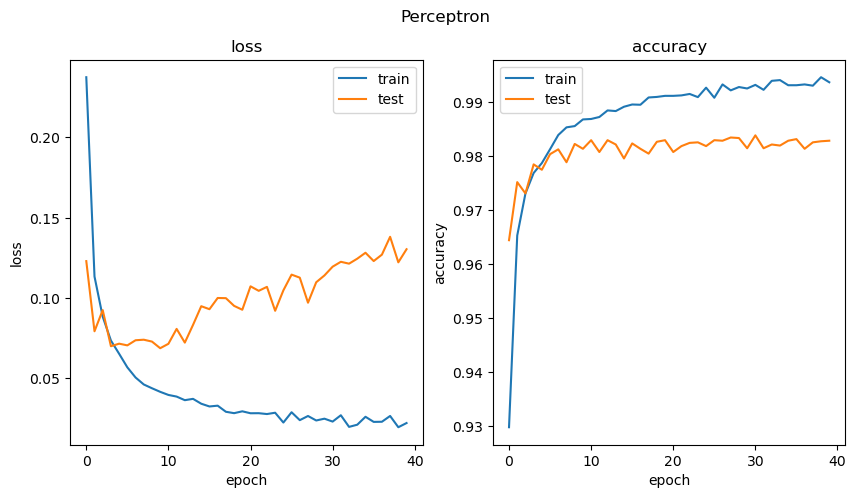

Running experiment DropConnectPerceptron with id 2847a12f-03f2-4ffb-9d1b-108c930e91bc
Tensorboard logs are saved in logs/DropConnectPerceptron-2847a12f-03f2-4ffb-9d1b-108c930e91bc
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.3, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.3, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

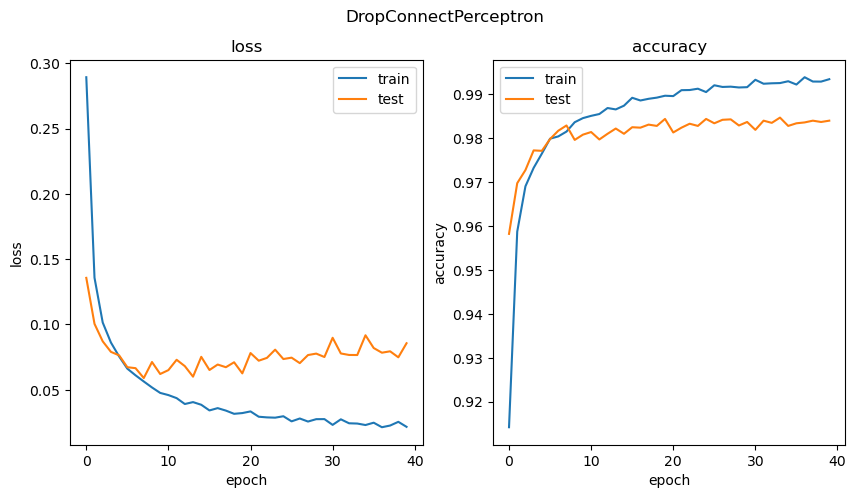

In [10]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = DropConnectPerceptron(784, 512, 10, p=0.3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id 059ef2c0-ed06-4452-aeb6-6b5037e98740
Tensorboard logs are saved in logs/Perceptron-059ef2c0-ed06-4452-aeb6-6b5037e98740
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
-------------------------------------------------------------

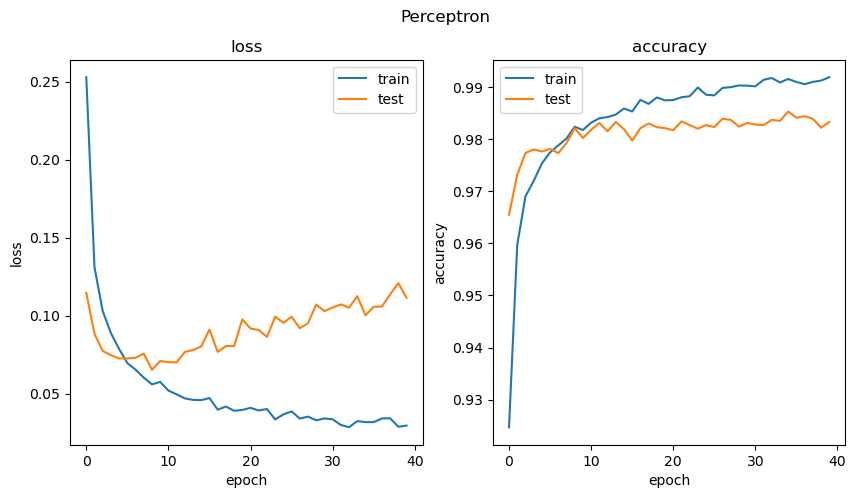

Running experiment DropConnectPerceptron with id 059ef2c0-ed06-4452-aeb6-6b5037e98740
Tensorboard logs are saved in logs/DropConnectPerceptron-059ef2c0-ed06-4452-aeb6-6b5037e98740
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

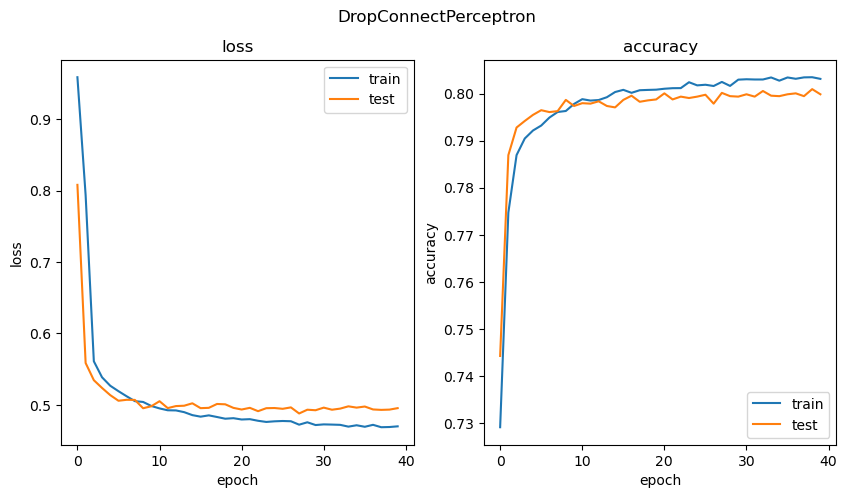

In [11]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

model = DropConnectPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=40)

Running experiment Perceptron with id a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Tensorboard logs are saved in logs/Perceptron-a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.4, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

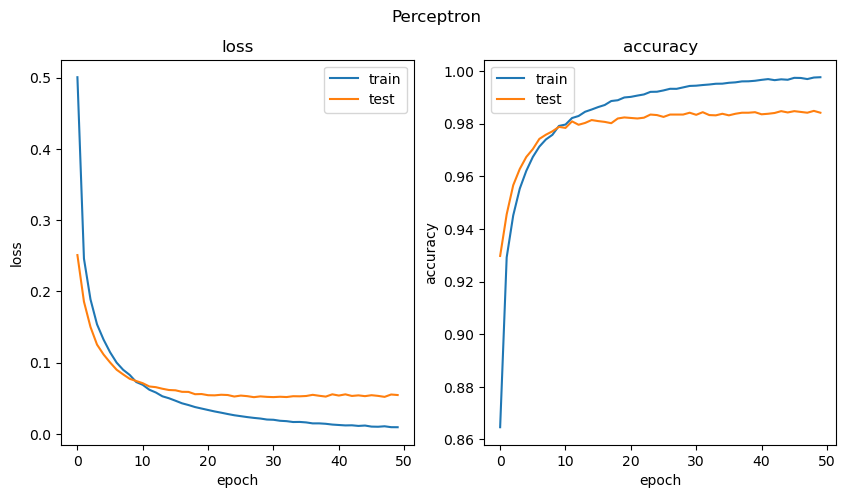

Running experiment DropConnectPerceptron with id a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Tensorboard logs are saved in logs/DropConnectPerceptron-a6b74cb6-d1ca-4c6d-9e80-a01a34994b5a
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.4, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.4, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

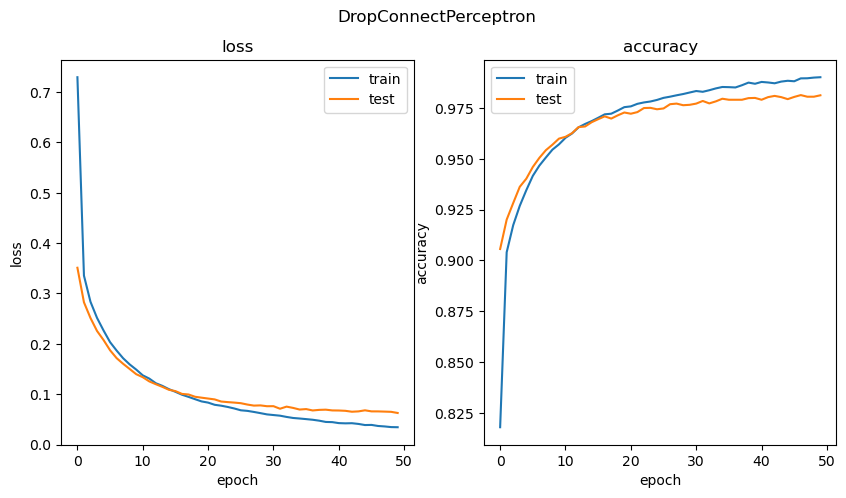

In [12]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.4).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment Perceptron with id a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Tensorboard logs are saved in logs/Perceptron-a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

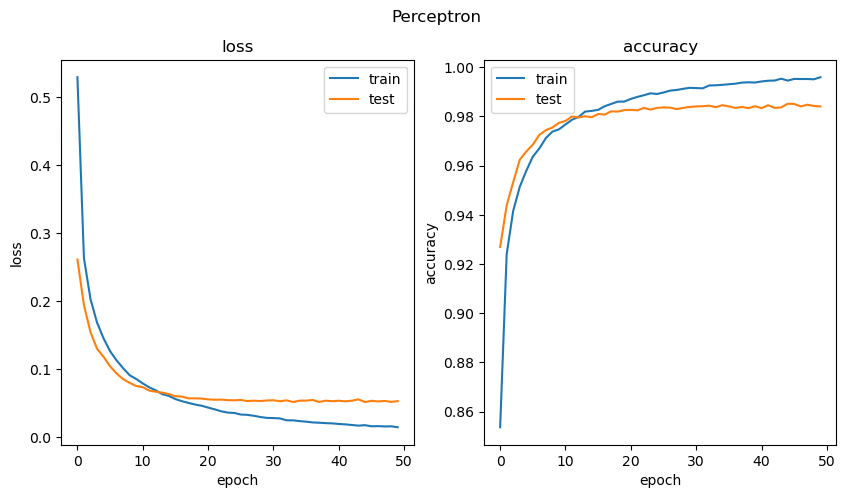

Running experiment DropConnectPerceptron with id a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Tensorboard logs are saved in logs/DropConnectPerceptron-a8c0b82d-bfa8-41f0-871c-c6d5830615ed
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

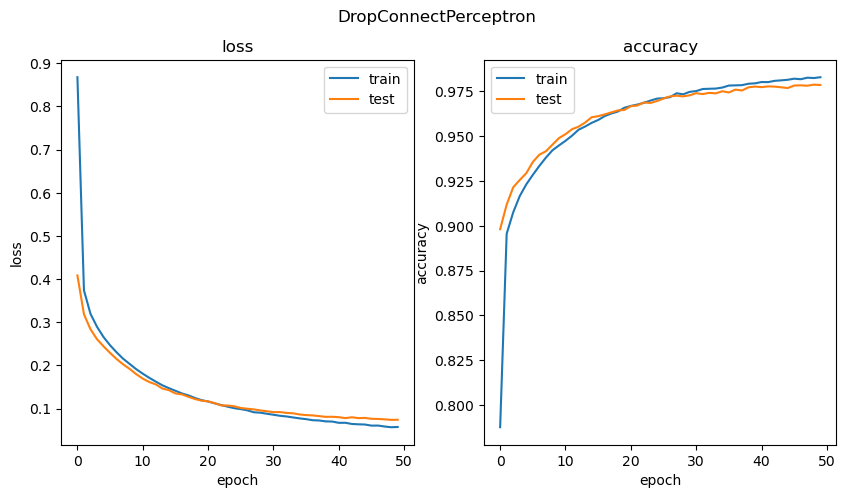

In [13]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

Running experiment DropConnectPerceptron with id b97c3391-104d-4d8e-8304-5e06aa7546fd
Tensorboard logs are saved in logs/DropConnectPerceptron-b97c3391-104d-4d8e-8304-5e06aa7546fd
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

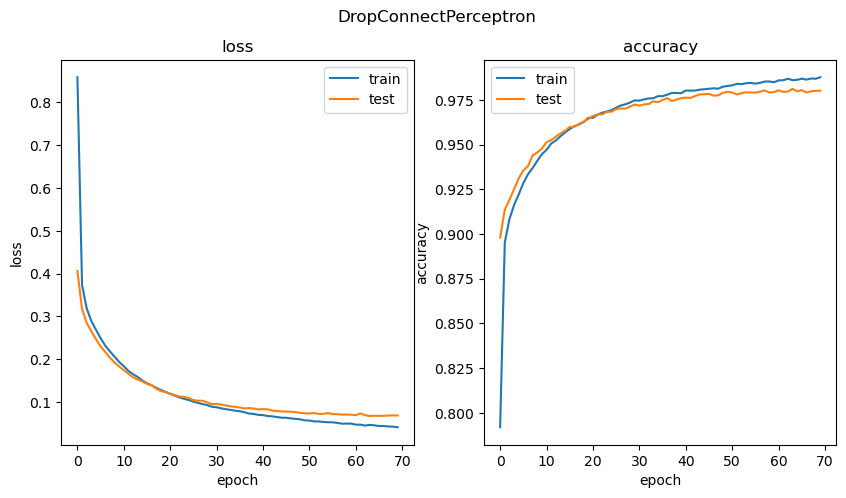

In [14]:
experiment = uuid4()
model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0001)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=70)

Running experiment Perceptron with id f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Tensorboard logs are saved in logs/Perceptron-f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): Perceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
      (3): Linear(in_features=512, out_features=10, bias=True)
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0
)
------------------------------------------------------------

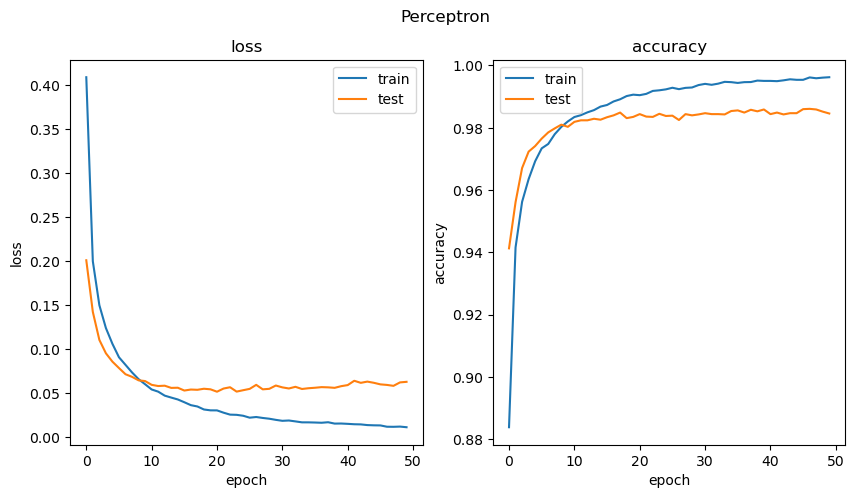

Running experiment DropConnectPerceptron with id f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Tensorboard logs are saved in logs/DropConnectPerceptron-f2ec30b1-2f6b-4e0b-aed8-da43ed916c07
Run tensorboard with: tensorboard --logdir=logs/
Open browser and go to: http://localhost:6006/
----------------------------------------------------------------
model: OptimizedModule(
  (_orig_mod): DropConnectPerceptron(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (layers): Sequential(
      (0): DropConnectLinear(in_features=784, out_features=512, bias=True, p=0.5, max_batch_size=256)
      (1): ReLU()
      (2): DropConnectBatchAverage()
      (3): DropConnectLinear(in_features=512, out_features=10, bias=True, p=0.5, max_batch_size=256)
      (4): ReLU()
      (5): DropConnectBatchAverage()
    )
  )
)
----------------------------------------------------------------
optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    ep

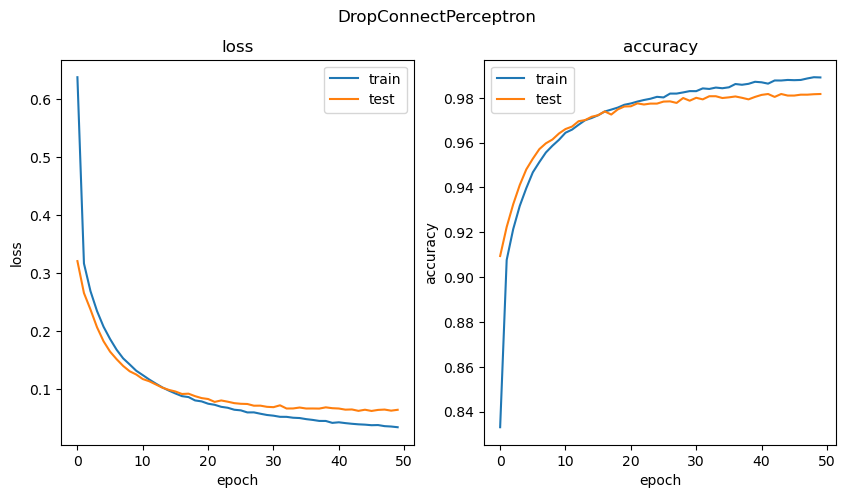

In [15]:
experiment = uuid4()
model = Perceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)

model = DropConnectPerceptron(784, 512, 10, p=0.5).to(device)
optimizer = Adam(model.parameters(), lr=0.0002)
criterion = CrossEntropyLoss()
compiled = torch.compile(model)

summary = Summary(name=model.__class__.__name__, id=experiment)
run(compiled, optimizer, criterion, device, loaders, summary, epochs=50)